# ¿Cómo funciona la suspensión de un auto?
 

<div>
<img style="float: left; margin: 0px 0px 15px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/ce/Packard_wishbone_front_suspension_%28Autocar_Handbook%2C_13th_ed%2C_1935%29.jpg/414px-Packard_wishbone_front_suspension_%28Autocar_Handbook%2C_13th_ed%2C_1935%29.jpg" width="150px" height="50px" />

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/df/Radaufhängung_Renault.JPG" width="150px" height="100px" />

</div>
 
> Una primer aproximación al modelo de la suspensión de un automovil es considerar el *oscilador armónico amortiguado*. 

<img style="float: center; margin: 0px 0px 15px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/4/45/Mass_spring_damper.svg" width="300px" height="100px" />

Referencia: 
- https://es.wikipedia.org/wiki/Oscilador_arm%C3%B3nico#Oscilador_arm.C3.B3nico_amortiguado

Un **modelo** que describe el comportamiento del sistema mecánico anterior es

\begin{equation}
m\frac{d^2 x}{dt^2}=-c\frac{dx}{dt}-kx
\end{equation}

donde $c$ es la constante de amortiguamiento y $k$ es la constante de elasticidad. <font color=red> Revisar modelado </font>

Documentación de los paquetes que utilizaremos hoy.
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html
- https://docs.scipy.org/doc/scipy/reference/index.html

___
En `python` existe una función llamada <font color = blue>_odeint_</font> del paquete <font color = blue>_integrate_</font> de la libreria <font color = blue>_scipy_</font>, que permite integrar sistemas vectoriales de primer orden, del tipo

\begin{equation}
\frac{d\boldsymbol{y}}{dt} = \boldsymbol{f}(t,\boldsymbol{y}); \qquad \text{ con }\quad \boldsymbol{y}\in\mathbb{R}^n,\quad \boldsymbol{f}:\mathbb{R}_{+}\times\mathbb{R}^n\to\mathbb{R}^n
\end{equation}

con condiciones iniciales $\boldsymbol{y}(0) = \boldsymbol{y}_{0}$. Notar que <font color=red> $\boldsymbol{y}$ representa un vector de $n$ componentes</font>.

Ahora, si nos fijamos bien, el modelo del *oscilador armónico amortiguado* que obtuvimos es una ecuación diferencial ordinaria (EDO) de segundo orden. No hay problema. La podemos convertir en un sistema de ecuaciones de primer orden de la siguiente manera:

1. Seleccionamos el vector $\boldsymbol{y}=\left[y_1\quad y_2\right]^T$, con $y_1=x$ y $y_2=\frac{dx}{dt}$.
2. Notamos que $\frac{dy_1}{dt}=\frac{dx}{dt}=y_2$ y $\frac{dy_2}{dt}=\frac{d^2x}{dt^2}=-\frac{c}{m}\frac{dx}{dt}-\frac{k}{m}x=-\frac{c}{m}y_2-\frac{k}{m}y_1$.
3. Entonces, el modelo de segundo orden lo podemos representar como el siguiente sistema vectorial de primer orden:

\begin{equation}
\frac{d\boldsymbol{y}}{dt}=\left[\begin{array}{c}\frac{dy_1}{dt} \\ \frac{dy_2}{dt}\end{array}\right]=\left[\begin{array}{c}y_2 \\ -\frac{k}{m}y_1-\frac{c}{m}y_2\end{array}\right]=\left[\begin{array}{cc}0 & 1 \\-\frac{k}{m} & -\frac{c}{m}\end{array}\right]\boldsymbol{y}.
\end{equation}

In [9]:
# Primero importamos todas las librerias, paquetes y/o funciones que vamos a utlizar
import matplotlib.pyplot as plt         # ¿Para qué sirve?
import numpy as np                      # ¿Para qué sirve?
from scipy.integrate import odeint      # Función para integrar EDO vectoriales de primer orden
%matplotlib inline                      # ¿Para qué sirve?

UsageError: unrecognized arguments: # ¿Para qué sirve?


In [56]:
# Definimos los parámetros
k = 5.0                                         # Constante del muelle
m = 2.0                                         # Masa
B = 1.5                                          # Constante de amortiguación

# Función f(t,y) que vamos a integrar
def armonico(y, t):
    y1, y2 = y
    return [y2, -k * y1 / m - B / m * y2]

y0 = [0.6, 0.4]                                 # Vector de posición inicial y velocidad inicial
                                                # condiciones iniciales y1(0)=0.6 [m] y2(0)=0.4 [m/s]

# Especificamos los puntos de tiempo donde queremos la solución
#tiempo = np.linspace(0, 15)                    # Dominio temporal de 0 a 15 (por defecto 50 puntos)
tt = np.arange(0, 10, .01)                       # Dominio temporal de 0 a 20 con paso de 0.01

yy = odeint(armonico, y0, tt)
#El sistema se resuelve  con 
#odeint(funcion_sistema, condiciones_iniciales, dominio_tiempo)

In [57]:
# Veamos como nos entrega las soluciones la funcion odeint
np.shape(yy)                                    # shape es una función de numpy que nos entrega las dimensiones del objeto

(1000, 2)

In [58]:
yy

array([[ 0.6       ,  0.4       ],
       [ 0.60391006,  0.38201823],
       [ 0.6076405 ,  0.36407564],
       ..., 
       [-0.00946496, -0.01858812],
       [-0.00964896, -0.01821119],
       [-0.00982918, -0.01783255]])

- $yy$ es una matriz de 2000 filas y 2 columnas.
- La primer columna de $yy$ corresponde a $y_1$.
- La segunda columna de $yy$ corresponde a $y_2$.

¿Cómo extraemos los resultados $y_1$ y $y_2$ independientemente?

In [59]:
## Una forma
#yy1 = yy[:,0]                                   # tome de yy todas las filas (:) y la primer columna
#yy2 = yy[:,1]                                   # tome de yy todas las filas (:) y la segunda columna

# Otra forma (más compacta)
yy1, yy2 = yy.T                                 # transponemos la matriz yy y extraemos los resultados. 

In [60]:
# Comandos para hacer los números de los ejes más grandes
import matplotlib as mpl
label_size = 14
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

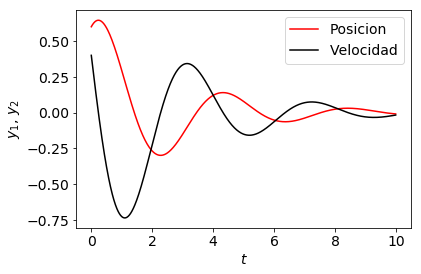

In [61]:
# Graficamos
plt.plot(tt, yy1, c = 'r', label="Posicion") 
plt.plot(tt, yy2, c = 'k', label="Velocidad")
plt.legend(loc = 'best', prop={'size': 14})    
plt.xlabel('$t$', fontsize = 14)
plt.ylabel('$y_1$, $y_2$', fontsize = 14)
plt.show()

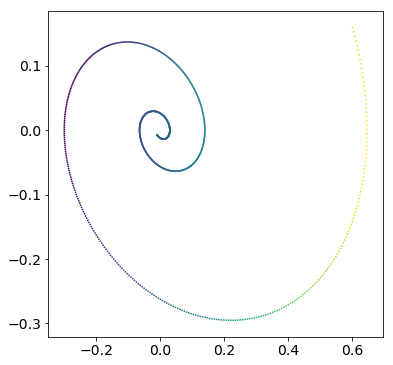

In [62]:
# Frecuencia natural
omega0 = k/m
# Graficamos el espacio fase
plt.figure(figsize = (6,6))
plt.scatter(yy1, yy2/omega0, lw = 0, s = 3, cmap = 'viridis', c = yy1)
plt.show()

## Dependiendo de los parámetros, 3 tipos de soluciones

Teníamos
\begin{equation}
m\frac{d^2 x}{dt^2} + c\frac{dx}{dt} + kx = 0
\end{equation}

si recordamos que $\omega_0 ^2 = \frac{k}{m}$ y definimos $\frac{c}{m}\equiv 2\Gamma$, tendremos

\begin{equation}
\frac{d^2 x}{dt^2} + 2\Gamma \frac{dx}{dt}+ \omega_0^2 x = 0
\end{equation}

### Subamortiguado

Si $\omega_0^2 > \Gamma^2$ se tiene movimiento oscilatorio *subamortiguado*. 

In [63]:
omega0 = k/m
Gamma = B/(2*m)

In [64]:
omega0**2, Gamma**2

(6.25, 0.140625)

In [65]:
omega0**2 > Gamma**2

True

Entonces, el primer caso que ya habíamos presentado corresponde a movimiento amortiguado. 

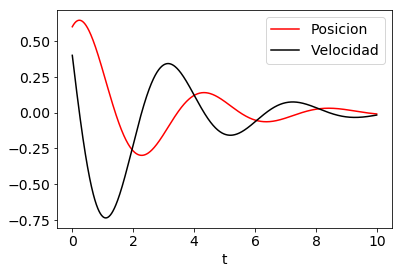

In [66]:
plt.figure()
plt.plot(tt, yy1, c = 'r', label="Posicion") 
plt.plot(tt, yy2, c = 'k', label="Velocidad")
plt.legend(loc = 'best', prop={'size': 14})    
plt.xlabel('t', fontsize = 14) 
plt.show()

### Sobreamortiguado

Si $\omega_0^2 < \Gamma^2$ se tiene movimiento oscilatorio *sobreamortiguado*. 

In [67]:
k = .1 # Constante del muelle
m = 1.0   # Masa
B = .5 # Constante de amortiguación

In [68]:
omega0 = k/m
Gamma = B/(2*m)

In [69]:
omega0**2, Gamma**2

(0.010000000000000002, 0.0625)

In [70]:
omega0**2 < Gamma**2

True

In [71]:
y0 = [0.6, 0.4] 
tt = np.arange(0, 20, .01)
yy = odeint(armonico, y0, tt) 

In [72]:
yy1s, yy2s = yy.T  # extraer posición y velocidad. 

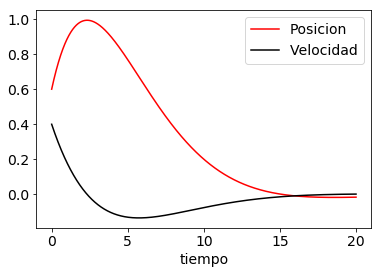

In [73]:
plt.plot(tt, yy1s, c = 'r', label="Posicion") 
plt.plot(tt, yy2s, c = 'k', label="Velocidad")
plt.legend(loc = 'best', prop={'size': 14})    
plt.xlabel('tiempo', fontsize = 14) 
plt.show()

### Amortiguamiento crítico

Si $\omega_0^2 = \Gamma^2$ se tiene movimiento *críticamente amortiguado*. 

In [74]:
k = np.sqrt(.0625) # Constante del muelle
m = 1.0   # Masa
B = .5 # Constante de amortiguación

In [75]:
omega0 = k/m
Gamma = B/(2*m)

In [76]:
omega0**2, Gamma**2

(0.0625, 0.0625)

In [31]:
omega0**2 == Gamma**2

True

In [32]:
y0 = [0.6, 0.4] 
tt = np.arange(0, 20, .01)
yy = odeint(armonico, y0, tt) 

In [33]:
yy1c, yy2c = yy.T  # extraer posición y velocidad. 

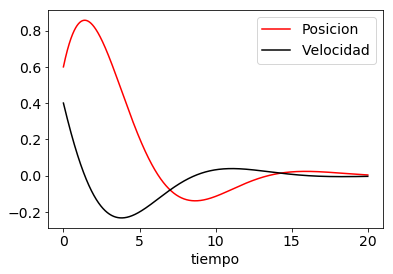

In [34]:
plt.plot(tt, yy1c, c = 'r', label="Posicion") 
plt.plot(tt, yy2c, c = 'k', label="Velocidad")
plt.legend(loc = 'best',prop={'size': 14})  
plt.xlabel('tiempo', fontsize = 14) 
plt.show()

En resumen, se tiene entonces: 

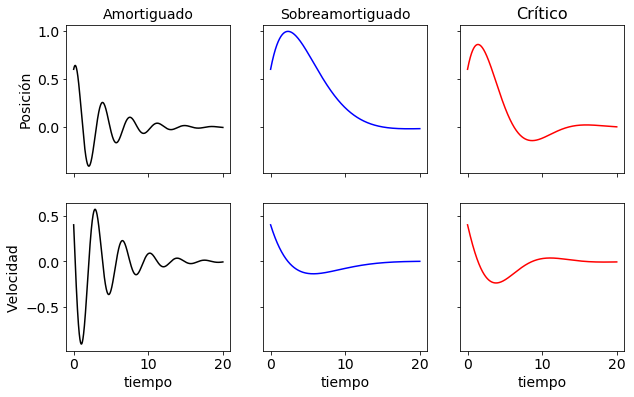

In [35]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col',
                                                       sharey='row',figsize =(10,6))
ax1.plot(tt, yy1, c = 'k') 
ax1.set_title('Amortiguado', fontsize = 14)
ax1.set_ylabel('Posición', fontsize = 14)
ax2.plot(tt, yy1s, c = 'b') 
ax2.set_title('Sobreamortiguado', fontsize = 14)
ax3.plot(tt, yy1c, c = 'r') 
ax3.set_title('Crítico', fontsize = 16)
ax4.plot(tt, yy2, c = 'k')
ax4.set_ylabel('Velocidad', fontsize = 14)
ax4.set_xlabel('tiempo', fontsize = 14)
ax5.plot(tt, yy2s, c = 'b')
ax5.set_xlabel('tiempo', fontsize = 14)
ax6.plot(tt, yy2c, c = 'r')
ax6.set_xlabel('tiempo', fontsize = 14)
plt.show()

> **Actividad**. ¿Cómo se ve el espacio fase para los diferentes casos así como para diferentes condiciones iniciales? 

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Lázaro Alonso. Modified by Esteban Jiménez Rodríguez.
</footer>